In [14]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
from IPython.display import display
import numpy as np
import sklearn
import mglearn

In [2]:
from sklearn.datasets import load_iris
iris_dataset = load_iris()

In [6]:
print "Keys:\n {}".format(iris_dataset.keys())
print "Target names:\n {}".format(iris_dataset['target_names'])
print "Feature names:\n {}".format(iris_dataset['feature_names'])

Keys:
 ['target_names', 'data', 'target', 'DESCR', 'feature_names']
Target names:
 ['setosa' 'versicolor' 'virginica']
Feature names:
 ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [7]:
iris_dataset['data'][:5]

array([[ 5.1,  3.5,  1.4,  0.2],
       [ 4.9,  3. ,  1.4,  0.2],
       [ 4.7,  3.2,  1.3,  0.2],
       [ 4.6,  3.1,  1.5,  0.2],
       [ 5. ,  3.6,  1.4,  0.2]])

## 成功評估：訓練和測試資料

即便執行很多次， 為了確保能得到同樣的結果，我們提供了用固定的數字當成random_state 的參數在偏亂數產生器中。這將使結果明確， 所以這一行將總是有相同的結果。
在本書中，當使用偽亂數產生器時， 將總是用同樣的方法固定random_state 。

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(iris_dataset['data'], iris_dataset['target'], random_state=0)

In [9]:
print "X_train shape:\n {}".format(X_train.shape)
print "y_train shape:\n {}".format(y_train.shape)

X_train shape:
 (112, 4)
y_train shape:
 (112,)


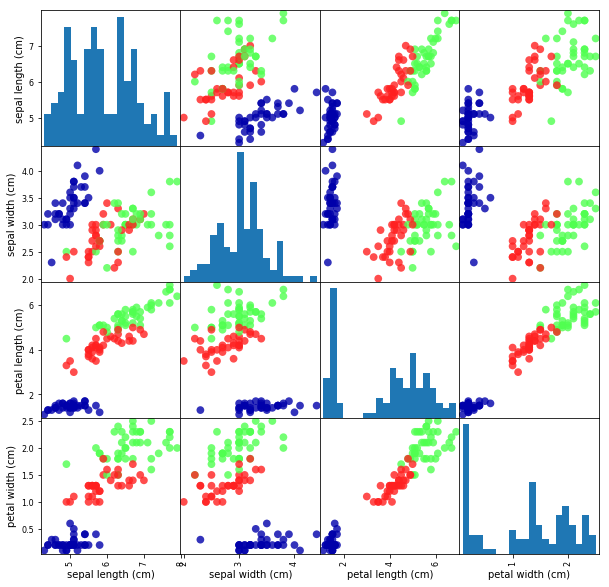

In [18]:
# 用X_train 資料建立dataframe
# 用iris_dataset.feature_names 的字串位當作標籤欄位

iris_dataframe = pd.DataFrame(X_train, columns=iris_dataset.feature_names)
pd.plotting.scatter_matrix(iris_dataframe, c=y_train, figsize=(10,10), marker='o',hist_kwds={'bins':20}, s=60, alpha=.8, cmap=mglearn.cm3)
plt.show()

In [20]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)

In [21]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

In [22]:
X_new = np.array([[5,2.9,1,0.2]])
print "X_new shape:{}".format(X_new.shape)

X_new shape:(1, 4)


In [23]:
prediction = knn.predict(X_new)
print "Prediction:{}".format(prediction)
print "target name:{}".format(iris_dataset['target_names'][prediction])

Prediction:[0]
target name:['setosa']


### 評估模組

In [24]:
y_pred = knn.predict(X_test)
print "Test set score:{}".format(np.mean(y_pred==y_test))

Test set score:0.973684210526


In [25]:
print "Test set score by score function:{}".format(knn.score(X_test, y_test))

Test set score by score function:0.973684210526
